<a href="https://colab.research.google.com/github/Neo-Julio/ml4HepNotebook/blob/main/7_ML_competitionGiulio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [1]:
%%bash
mkdir -p data

In [2]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [   <=>              ]   2.62G  14.0MB/s    in 10m 31s 


In [3]:
!unzip data/higgs.zip

Archive:  data/higgs.zip
  inflating: HIGGS.csv.gz            


In [4]:
!gzip -d HIGGS.csv.gz

In [5]:
!ls

data  HIGGS.csv  sample_data


In [6]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

In [9]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [10]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [11]:
#don't run! Pevious split
#y = df['lable'].values
#X = df[[col for col in features]]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


In [12]:
#split in training test and validation + scaler to a gaussian centered in 0 and
#sigma = 1

y = df['lable'].values
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_val = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train, test_size=0.2, random_state=7
)

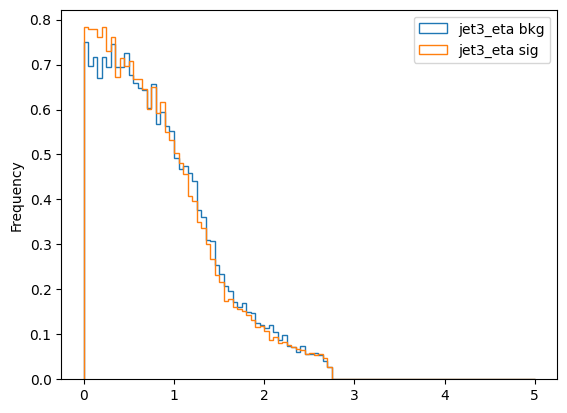

In [13]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'jet3_eta'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [14]:
#find a classification algorithm to solve this classification problem. THe metrics is the area under the ROC with the test set
# DNN with a sigmoid o BDT


In [15]:
# Enjoy!

 A dense NN layer. We'll start with a dense (fully-connected) NN layer. Our model will have a single fully-connected hidden layer with the same number of neurons as input variables. The weights are initialized using a small Gaussian random number. We will switch between linear and tanh activation functions for the hidden layer. The output layer contains a single neuron in order to make predictions. It uses the sigmoid activation function in order to produce a probability output in the range of 0 to 1.

In [16]:
#model building
"""

#Linear + Sigmoid
model = torch.nn.Sequential(torch.nn.Linear(28, 1), torch.nn.Sigmoid())

# Use Binary Cross Entropy as our loss function.
loss_fn = torch.nn.BCELoss()

# Optimize the model parameters using the Adam optimizer.
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
"""

'\n\n#Linear + Sigmoid\nmodel = torch.nn.Sequential(torch.nn.Linear(28, 1), torch.nn.Sigmoid())\n\n# Use Binary Cross Entropy as our loss function.\nloss_fn = torch.nn.BCELoss()\n\n# Optimize the model parameters using the Adam optimizer.\nlearning_rate = 0.001\noptimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)\n'

In [17]:
# Define the model: 28 → 16 → 8 → 1 with activations
import torch
import torch.nn as nn

# Define the model: 28 → 16 → 8 → 1 with activations
model = nn.Sequential(
    nn.Linear(28, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()  # For binary classification
)

"""
model = nn.Sequential(
    nn.Linear(28, 64),
    nn.ReLU(),
 #   nn.Dropout(0.3),           # 30% dropout

    nn.Linear(64, 32),
    nn.ReLU(),
 #   nn.Dropout(0.3),

    nn.Linear(32, 16),
    nn.ReLU(),
  #  nn.Dropout(0.2),

    nn.Linear(16, 1),
    nn.Sigmoid()
)
"""

# Define loss function: Binary Cross-Entropy
loss_fn = nn.BCELoss()

# Define optimizer: Adam
learning_rate = 0.00005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
# Get validation data ready
val_data = torch.from_numpy(X_val).float()
val_label = torch.from_numpy(y_val).float()

In [19]:
"""
from tqdm import tqdm  # for progress bar while training

losses, val_losses = [], []
min_loss, stale_epochs = 100.0, 0

# 500 epochs.
batch_size = 1024
for t in tqdm(range(500)):
    batch_loss, val_batch_loss = [], []

    for b in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[b : b + batch_size]
        Y_batch = y_train[b : b + batch_size]
        x = torch.from_numpy(X_batch).float()
        y_b = torch.from_numpy(Y_batch).float()
        y_b = y_b.view(-1, 1)

        # Forward pass: make a prediction for each x event in batch b.
        y_pred = model(x)

        # Get the labels.
        label = y_b
        y = label.view_as(y_pred)  # reshape label data to the shape of y_pred

        # Compute and print loss.
        loss = loss_fn(y_pred, y)
        batch_loss.append(loss.item())

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()

        # Let's look at the validation set.

        # Torch keeps track of each operation performed on a Tensor, so that it can take the gradient later.
        # We don't need to store this information when looking at validation data, so turn it off with
        # torch.no_grad().
        model.eval()
        with torch.no_grad():
            # Forward pass on validation set.
            output = model(val_data)

            # Get labels and compute loss again
            val_y = val_label.view_as(output)
            val_loss = loss_fn(output, val_y)
            val_batch_loss.append(val_loss.item())

            # Monitor the loss function to prevent overtraining.
            if stale_epochs > 20:
                break

            if val_loss.item() - min_loss < 0:
                min_loss = val_loss.item()
                stale_epochs = 0
                torch.save(model.state_dict(), "pytorch_model_best.pth")
            else:
                stale_epochs += 1

    losses.append(np.mean(batch_loss))
    val_losses.append(np.mean(val_batch_loss))

    """

'\nfrom tqdm import tqdm  # for progress bar while training\n\nlosses, val_losses = [], []\nmin_loss, stale_epochs = 100.0, 0\n\n# 500 epochs.\nbatch_size = 1024\nfor t in tqdm(range(500)):\n    batch_loss, val_batch_loss = [], []\n\n    for b in range(0, X_train.shape[0], batch_size):\n        X_batch = X_train[b : b + batch_size]\n        Y_batch = y_train[b : b + batch_size]\n        x = torch.from_numpy(X_batch).float()\n        y_b = torch.from_numpy(Y_batch).float()\n        y_b = y_b.view(-1, 1)\n\n        # Forward pass: make a prediction for each x event in batch b.\n        y_pred = model(x)\n\n        # Get the labels.\n        label = y_b\n        y = label.view_as(y_pred)  # reshape label data to the shape of y_pred\n\n        # Compute and print loss.\n        loss = loss_fn(y_pred, y)\n        batch_loss.append(loss.item())\n\n        # Before the backward pass, use the optimizer object to zero all of the\n        # gradients for the variables it will update (which are t

In [20]:
from tqdm import tqdm  # for progress bar while training
# Tracking loss values
losses, val_losses = [], []
batch_size = 1024
min_loss = float('inf')
stale_epochs = 0
#n_epochs = 500
for t in tqdm(range(500)):
    model.train()
   # batch_loss = []
    batch_loss, val_batch_loss = [], []
    # Shuffle training data at each epoch (optional but recommended)
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train[indices]
    y_train = y_train[indices]

    # Mini-batch training loop
    for b in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[b : b + batch_size]
        Y_batch = y_train[b : b + batch_size]

        x = torch.from_numpy(X_batch).float()
        y = torch.from_numpy(Y_batch).float().view(-1, 1)

        # Forward pass
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        batch_loss.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Store average training loss for the epoch
    losses.append(np.mean(batch_loss))

    # Validation loss (once per epoch)
    model.eval()
    with torch.no_grad():
        output = model(val_data)
        val_y = val_label.view_as(output)
        val_loss = loss_fn(output, val_y)
        val_losses.append(val_loss.item())

    # Early stopping
    if val_loss.item() < min_loss:
        min_loss = val_loss.item()
        stale_epochs = 0
        torch.save(model.state_dict(), "pytorch_model_best.pth")
    else:
        stale_epochs += 1

    if stale_epochs > 20:
        print(f"Early stopping at epoch {t} (val_loss didn't improve for 20 epochs)")
        break

100%|██████████| 500/500 [04:02<00:00,  2.06it/s]


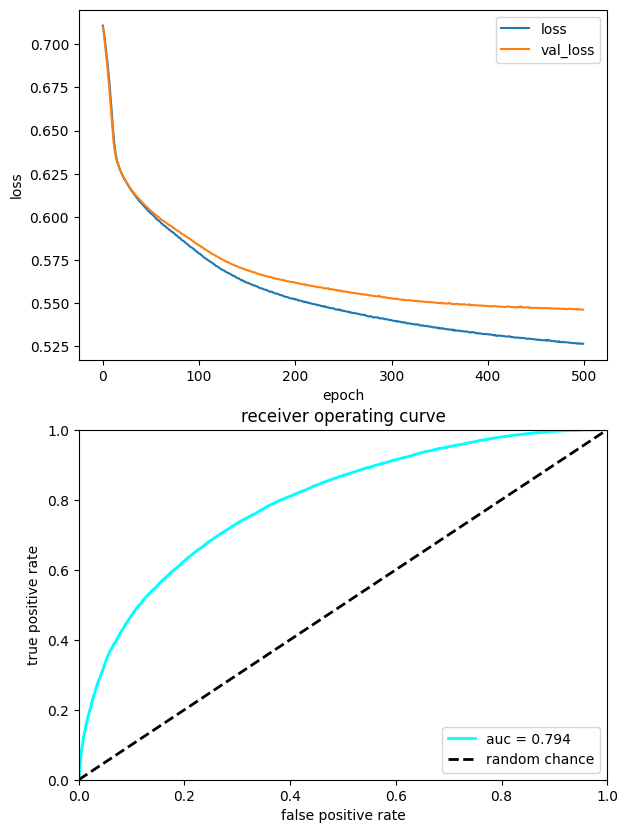

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

with torch.no_grad():
    # plot loss vs epoch
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(2, 2, 1)
    ax.plot(losses, label="loss")
    ax.plot(val_losses, label="val_loss")
    ax.legend(loc="upper right")
    ax.set_xlabel("epoch")
    ax.set_ylabel("loss")

    # Plot ROC
    X_test_in = torch.from_numpy(X_test).float()
    y_predict = model(X_test_in)
    from sklearn.metrics import roc_curve, auc

    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    ax = plt.subplot(2, 2, 3)
    ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel("false positive rate")
    ax.set_ylabel("true positive rate")
    ax.set_title("receiver operating curve")
    ax.legend(loc="lower right")
    plt.show()

In [22]:
# Assume model expects 28 features
n_features = X_train.shape[1]

# Get mean of training data
mean_vec = X_train.mean(axis=0)

# Prepare 2D grid for feature i and j (e.g., feature 0 and 1)
i, j = 1, 10  # feature indices you want to plot
myXI, myYI = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

grid_points = np.tile(mean_vec, (myXI.size, 1))  # (40000, 28)
grid_points[:, i] = myXI.ravel()
grid_points[:, j] = myYI.ravel()

# Predict
with torch.no_grad():
    myZI = model(torch.from_numpy(grid_points).float()).numpy()
    myZI = myZI.reshape(myXI.shape)

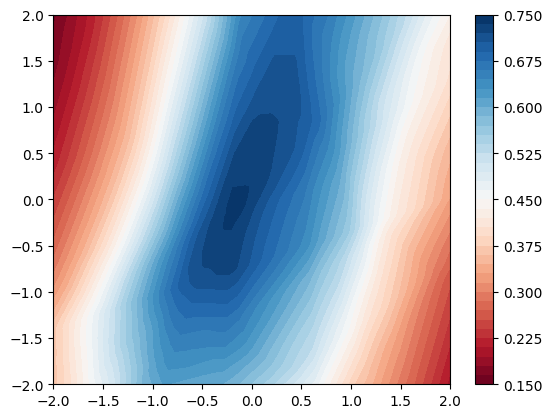

In [23]:
plt.contourf(myXI, myYI, myZI, levels=50, cmap='RdBu')
plt.colorbar()